In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
data=pd.read_csv('Downloads/Iris.csv')
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [3]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

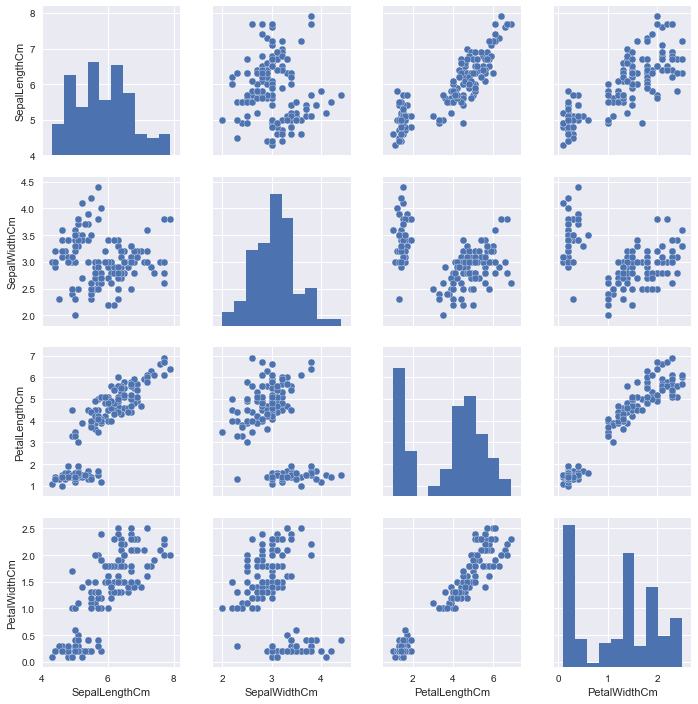

In [4]:
import seaborn as sns
sns.pairplot(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [5]:
species_dummies=pd.get_dummies(data['Species'])

In [6]:
species_dummies.head(2)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
X=data.drop(['Id','Species'],axis=1)
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [9]:
Y=data['Species']
Y.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
Y=Y.map({'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3})
Y.head(3)

0    1
1    1
2    1
Name: Species, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\Harikumar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.35)

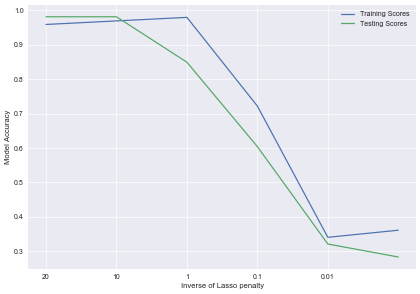

In [13]:
logistic_models={}
training_scores=[]
testing_scores=[]
for alpha in [20,10,1,0.1,0.01,0.001]:
    lr=LogisticRegression(C=alpha,penalty='l1')
    lr.fit(x_train,y_train)
    training_scores.append(lr.score(x_train,y_train))
    testing_scores.append(lr.score(x_test,y_test))
    logistic_models[alpha]=lr
plt.figure(dpi=50,figsize=[10,7])
plt.xlabel('Inverse of Lasso penalty')
plt.ylabel('Model Accuracy')

plt.plot(training_scores,label="Training Scores")
plt.plot(testing_scores,label="Testing Scores")
plt.xticks(range(5),[20,10,1,0.1,0.01,0.001])
plt.legend(loc="best")

In [26]:
logistic_models

{0.001: LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 0.01: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 0.1: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 1: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           pena

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
logistic_model=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)
print("training score : {}".format(logistic_model.score(x_train,y_train)))
print("Testing score : {}".format(logistic_model.score(x_test,y_test)))
print("number of features used : {}".format(np.sum(logistic_model.coef_!=0)))
print(classification_report(y_test,y_pred))

training score : 0.9690721649484536
Testing score : 0.9811320754716981
number of features used : 10
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        15
          2       0.94      1.00      0.97        17
          3       1.00      0.95      0.98        21

avg / total       0.98      0.98      0.98        53



In [27]:
pred=logistic_model.predict(X.head(1))
pred

array([1], dtype=int64)

In [21]:
y_pred=logistic_model.predict_proba(x_test)
y_pred[3]

array([  7.55420543e-04,   1.13448390e-01,   8.85796189e-01])

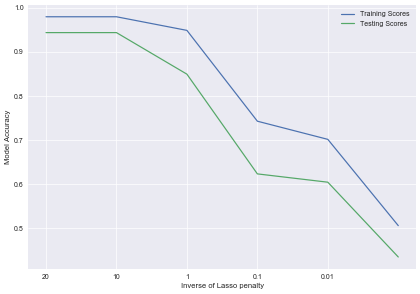

In [28]:
logistic_models={}
training_scores=[]
testing_scores=[]
for alpha in [20,10,1,0.1,0.01,0.001]:
    lr=LogisticRegression(C=alpha,penalty='l2')
    lr.fit(x_train,y_train)
    training_scores.append(lr.score(x_train,y_train))
    testing_scores.append(lr.score(x_test,y_test))
    logistic_models[alpha]=lr
plt.figure(dpi=50,figsize=[10,7])
plt.xlabel('Inverse of Lasso penalty')
plt.ylabel('Model Accuracy')

plt.plot(training_scores,label="Training Scores")
plt.plot(testing_scores,label="Testing Scores")
plt.xticks(range(5),[20,10,1,0.1,0.01,0.001])
plt.legend(loc="best")

In [29]:
logistic_model=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)
print("training score : {}".format(logistic_model.score(x_train,y_train)))
print("Testing score : {}".format(logistic_model.score(x_test,y_test)))
print("number of features used : {}".format(np.sum(logistic_model.coef_!=0)))
print(classification_report(y_test,y_pred))

training score : 0.979381443298969
Testing score : 0.9433962264150944
number of features used : 12
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        15
          2       0.85      1.00      0.92        17
          3       1.00      0.86      0.92        21

avg / total       0.95      0.94      0.94        53



In [87]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42)
model.fit(x_train,y_train)
score=model.score(x_test,y_test)
score

0.94339622641509435

In [91]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train,y_train)
score=model.score(x_test,y_test)
score

0.96226415094339623

In [1]:
import os
print(os.getcwd())


C:\Users\Harikumar
